<a href="https://colab.research.google.com/github/alexguttlein/TP1-AnalisisExploratorioDeDatos/blob/main/TP1_An%C3%A1lisis_Exploratorio_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cleaned_reviews = pd.read_csv("/content/cleaned-reviews.csv")

In [3]:
customer_airways = pd.read_csv("/content/customer_airways_data.csv",encoding = "ISO-8859-1")

In [4]:
cleaned_reviews.head()

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...


In [5]:
customer_airways.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
customer_airways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# **Países qué más reservas realizan**

---

In [7]:
#se agrega una columna con el total de vuelos desde cada pais de origen
customer_airways['total_reservas_origen'] = customer_airways.groupby('booking_origin')['num_passengers'].transform('count')

In [8]:
#se agrega una columna con el total de pasajeros de cada origen VER SI HACE FALTA
customer_airways['Total pasajeros'] = customer_airways.groupby('booking_origin')['num_passengers'].transform('sum')

In [9]:
#paises origen que más buscan realizar una reserva y cuantas son realmente completadas
mas_reservas = customer_airways.groupby('booking_origin')['num_passengers'].count().sort_values(ascending=False).head(10)
mas_reservas

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Name: num_passengers, dtype: int64

In [10]:
#agrupo por pais origen, y veo cuantas reservas completadas tienen. Lo agrego en nueva columna
customer_airways["total_reservas_completadas"] = customer_airways.groupby('booking_origin')['booking_complete'].transform('sum')
customer_airways

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_reservas_origen,Total pasajeros,total_reservas_completadas
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1074,1634,54
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,1074,1634,54
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1270,2130,131
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1074,1634,54
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1270,2130,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,17872,25831,900
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,17872,25831,900
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,17872,25831,900
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,17872,25831,900


In [11]:
#filtro por los 10 origenes que tienen mayor cantidad de reservas
mas_reservas = customer_airways[['booking_origin','total_reservas_origen','total_reservas_completadas']].sort_values(by='total_reservas_origen', ascending=False)
mas_reservas_filtrado = mas_reservas.drop_duplicates(subset=['booking_origin']).head(10).reset_index()

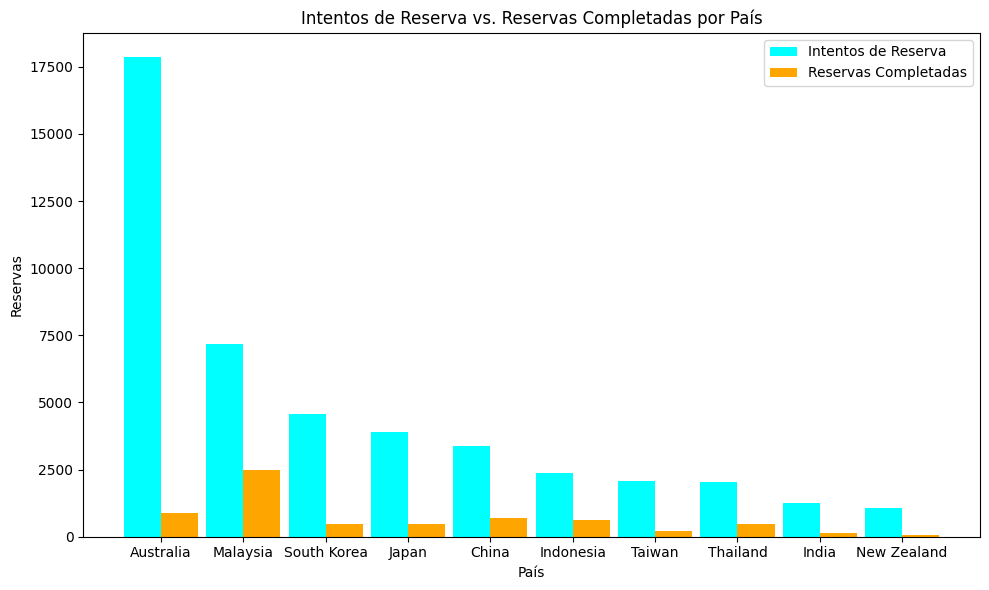

In [14]:
#grafico de barras donde se aprecia la cantidad de reservas completadas vs la cantidad de intentos de reserva desde cada origen.

#Ancho de las barras
bar_width = 0.45

# Definir la ubicación de las barras
index = range(len(mas_reservas_filtrado))

# Crear el gráfico de barras con barras dobles
plt.figure(figsize=(10, 6))
plt.bar(index, mas_reservas_filtrado['total_reservas_origen'], bar_width, label='Intentos de Reserva', color='cyan')
plt.bar([i + bar_width for i in index], mas_reservas_filtrado['total_reservas_completadas'], bar_width, label='Reservas Completadas', color='orange')

plt.xlabel('País')
plt.ylabel('Reservas')
plt.title('Intentos de Reserva vs. Reservas Completadas por País')
plt.xticks([i + bar_width / 2 for i in index], mas_reservas_filtrado['booking_origin'])
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
#se agrega columna con el porcentaje de reservas completadas desde cada origen
mas_reservas['porcentaje_completadas'] = (mas_reservas['total_reservas_completadas'] * 100) / mas_reservas['total_reservas_origen']

In [16]:
#se filtran los origenes duplicados y se dejan los 15 con mayor cantidad de vuelos
mas_reservas_filtrado = mas_reservas.drop_duplicates(subset=['booking_origin']).head(15).reset_index()
mas_reservas_filtrado

,index,booking_origin,total_reservas_origen,total_reservas_completadas,porcentaje_completadas
0,25000,Australia,17872,900,5.035810
1,23092,Malaysia,7174,2468,34.402007
2,34726,South Korea,4559,462,10.133801
3,32209,Japan,3885,478,12.303732
4,26328,China,3387,694,20.490109
5,29946,Indonesia,2369,615,25.960321
6,29045,Taiwan,2077,224,10.784786
7,30791,Thailand,2030,470,23.152709
8,8855,India,1270,131,10.314961
9,2008,New Zealand,1074,54,5.027933


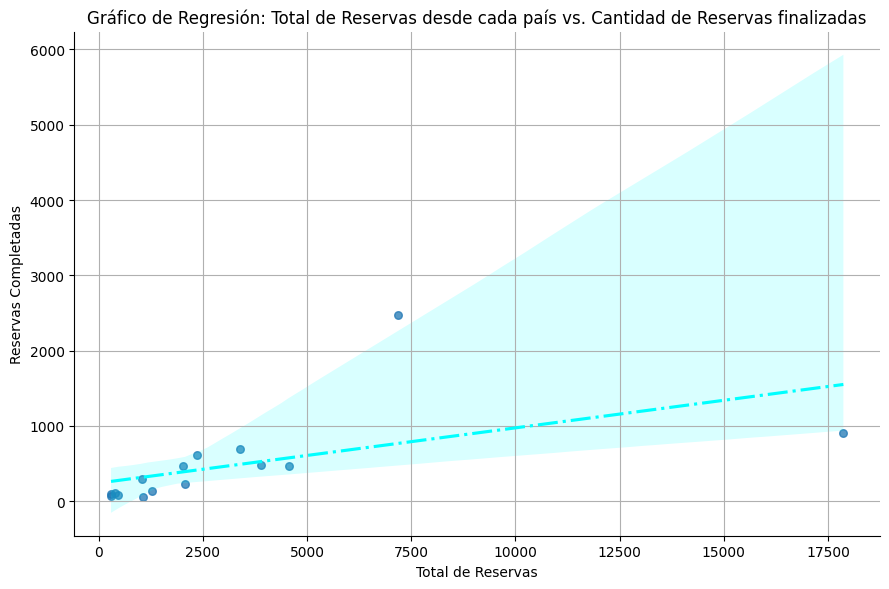

In [17]:
#se genera un gráfico de regresión para determinar si hay algo destacable en la relacion entre el origen de las reservas y la cantidad de reservas completadas.

sns.lmplot(x='total_reservas_origen', y='total_reservas_completadas', data=mas_reservas_filtrado, height=6, aspect=1.5, line_kws={'color':'cyan', 'linestyle': '-.'}, palette='pastel',
           scatter_kws={'alpha': 0.75, 's': 30})

plt.title('Gráfico de Regresión: Total de Reservas desde cada país vs. Cantidad de Reservas finalizadas')
plt.xlabel('Total de Reservas')
plt.ylabel('Reservas Completadas')
plt.grid(True)
plt.tight_layout()
plt.show()

***Conclusión:***

En el gráfico anterior, como uno esperaría, a mayor cantidad de intentos de reserva hay mayor cantidad de reservas completadas. En la mayoría de los países se ve una relación lineal, a excepción de dos casos especiales:

-Se puede ver que el origen desde el que más se intenta reservar (Australia) tiene una cantidad de reservas muy por debajo de lo esperado.

-Por el contrario se puede notar que la cantidad de reservas completadas es muy elevada en el siguiente origen con mayor cantidad de interés de reserva (Malasia).

Podría considerarse que los habitantes de Malasia son más decididos a la hora de realizar una reserva. Esto podría servirle a la compañía para aumentar su publicidad en Malasia y tal vez también buscar incentivar a los Australianos para que elijan volar más con la compañía.

# **Rutas más solicitadas desde Australia**

---

In [18]:
#busco analizar si hay algun patron entre las rutas de las reservas completas y las incompletas de los australianos
australia_reservas = customer_airways.loc[customer_airways['booking_origin'] == 'Australia',:]

In [19]:
#separo las reservas australianas entre completadas y no completadas
#completadas
australia_reservas_ok = australia_reservas.loc[australia_reservas['booking_complete'] == 1,:].sort_values(by='route', ascending=True).reset_index()
australia_reservas_ok = australia_reservas_ok.drop('index', axis=1)

#no completadas
australia_reservas_no = australia_reservas.loc[australia_reservas['booking_complete'] == 0,:].sort_values(by='route', ascending=True).reset_index()
australia_reservas_no = australia_reservas_no.drop('index', axis=1)

australia_reservas_ok

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_reservas_origen,Total pasajeros,total_reservas_completadas
0,1,Internet,RoundTrip,107,23,12,Sun,AKLKUL,Australia,1,0,1,8.83,1,17872,25831,900
1,2,Internet,RoundTrip,17,5,19,Thu,AKLKUL,Australia,0,0,0,8.83,1,17872,25831,900
2,1,Internet,RoundTrip,151,6,5,Tue,AKLKUL,Australia,0,0,1,8.83,1,17872,25831,900
3,3,Internet,RoundTrip,112,6,12,Wed,AKLKUL,Australia,1,0,1,8.83,1,17872,25831,900
4,2,Internet,RoundTrip,205,27,11,Tue,AORMEL,Australia,1,0,0,8.83,1,17872,25831,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1,Internet,RoundTrip,16,4,5,Thu,SINSYD,Australia,0,0,0,8.58,1,17872,25831,900
896,2,Internet,RoundTrip,264,90,9,Mon,SUBSYD,Australia,1,0,1,8.58,1,17872,25831,900
897,2,Internet,RoundTrip,51,24,11,Mon,SYDSZX,Australia,1,1,1,8.58,1,17872,25831,900
898,1,Internet,RoundTrip,40,119,7,Sun,SYDTRZ,Australia,1,1,1,8.58,1,17872,25831,900


In [20]:
#agrego una columna con el total de veces que se repite cada ruta
australia_reservas_ok['route_total'] = australia_reservas_ok.groupby('route')['booking_complete'].transform('count')
australia_reservas_no['route_total'] = australia_reservas_no.groupby('route')['booking_complete'].transform('count')

#elimino las rutas duplicadas para que cada una solo aparezca una vez con su respectivo numero de repeticiones
australia_reservas_ok = australia_reservas_ok.drop_duplicates(subset=['route']).sort_values(by='route_total', ascending=False).reset_index()
australia_reservas_ok = australia_reservas_ok.drop('index',axis=1)

australia_reservas_no = australia_reservas_no.drop_duplicates(subset=['route']).sort_values(by='route_total', ascending=False).reset_index()
australia_reservas_no = australia_reservas_no.drop('index',axis=1)

In [21]:
#se toman las 10 rutas más consultadas para luego analizar el porcentaje de reservas completadas de cada una de estas
australia_reservas_no = australia_reservas_no.sort_values(by='route_total',ascending=False).head(10)
australia_reservas_no = australia_reservas_no[['booking_origin', 'route', 'route_total']]
australia_reservas_no

,booking_origin,route,route_total
0,Australia,MELSGN,704
1,Australia,DMKOOL,524
2,Australia,DMKPER,517
3,Australia,SGNSYD,489
4,Australia,COKSYD,445
5,Australia,CMBMEL,420
6,Australia,COKMEL,395
7,Australia,DMKSYD,368
8,Australia,PERSGN,313
9,Australia,HKTSYD,310


In [22]:
#se fusionan ambos datasets pero solo considerando las rutas más consultadas.
australia_reservas_merge = pd.merge(australia_reservas_no, australia_reservas_ok, on='route', how='left')

#al dataset de las rutas más consultadas se le agrega una columna con el total de reservas completadas para cada ruta.
australia_reservas_no['route_total_reserved'] = australia_reservas_merge['route_total_y']

#se calcula el porcentaje de reservas completadas.
australia_reservas_no['route_efectivity_average'] = (australia_reservas_no['route_total_reserved'] / australia_reservas_no['route_total']) * 100
australia_reservas_no

,booking_origin,route,route_total,route_total_reserved,route_efectivity_average
0,Australia,MELSGN,704,17,2.414773
1,Australia,DMKOOL,524,21,4.007634
2,Australia,DMKPER,517,12,2.321083
3,Australia,SGNSYD,489,38,7.770961
4,Australia,COKSYD,445,23,5.168539
5,Australia,CMBMEL,420,7,1.666667
6,Australia,COKMEL,395,23,5.822785
7,Australia,DMKSYD,368,11,2.989130
8,Australia,PERSGN,313,16,5.111821
9,Australia,HKTSYD,310,11,3.548387


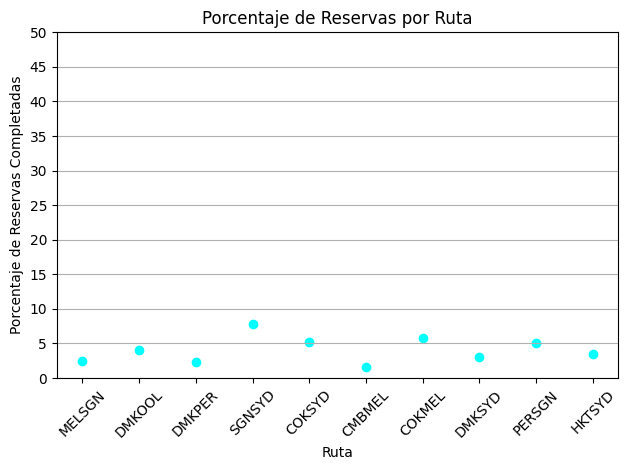

In [23]:
plt.scatter(australia_reservas_no['route'], australia_reservas_no['route_efectivity_average'], color='cyan')
#plt.figure(figsize=(8, 6))

plt.yticks(range(0, 51, 5))

plt.title('Porcentaje de Reservas por Ruta')
plt.xlabel('Ruta')
plt.ylabel('Porcentaje de Reservas Completadas')

plt.xticks(rotation=45)

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Una **conclusión** que se podría obtener de los bajos porcentajes de reservas completadas podría ser que los precios de la aerolínea son demasiado elevados para los habitantes de este país y las personas deciden volar con otra compañía.